# Link Budget

Mach 30 is designing a radio to receive transmissions from satellites (a ground station), named Ground Sphere. Link budgets are crucial calculations for determining whether the ground station's design will be able to receive the signals transmitted by a given satellite. A link budget factors in all the power gains and losses in the system composed of the transmitter (satellite), receiver (ground station), and everything in between.

The calculations themselves are implemented by a python class named test_link_budget.py. The class models what are generally the most significant factors in calculating a link budget. Many factors are difficult or impossible to accurately factor in, such as the amount of noise a tropical storm may introduce into the system. Several aspects of the budget are averages or otherwise estimated values.

## Overview

The Link Margin input parameters are described in the table below. Please note that for the equations to function, losses will be negative numbers, while gains are positive numbers.

| Input | Units |Symbols|
|---|---|-----:|
|Ground Station Altitude| m | $${A}_{GS}$$ |
|Satellite Orbital Altitude| km | $${A}_{SAT}$$ |
|Orbit Elevation Angle| deg | $${El}$$ |
|Downlink Frequency| MHz |$${f}$$ |
|Target Energy per Bit to Noise Power Ratio | dB |$${Eb}/{No_T}$$ |
|Implementation Loss | dB | $${L_{Imp}}$$| 
|Transmit Power | W |$${P_{Tr}}$$ | 
|Transmit Losses | dB |$${L_{Tr}}$$| 
|Transmit Antenna Gain | dB |$${G_{Tr}}$$ |  
|Transmit Pointing Loss | dB |$${L_{TrP}}$$ |
|Polarization Losses | dB | $${L_{Pol}}$$| 
|Atmospheric Loss | dB |$${L_{At}}$$ |
|Receiver Antenna Gain | dB |$${G_{Re}}$$ | 
|Receiver Pointing Loss | dB |$${L_{ReP}}$$ | 
|System Noise Figure | dB |$${N_{Sys}}$$ | 
|Noise Bandwidth | kHz|$${BW}$$|

|Other Variables |Units|Symbols| 
|---|---|--:|
|Wavelength| m |$${\lambda}$$ |
|Link Distance | km |$${D}$$ | 
|Required Bit Energy to Noise Spectal Power Density Ratio |dB |$${{Eb/No}_R}$$ |
|Converted Transmit Power| dBm |$${P_{TrC}}$$ |
|Transmit Effective Isoptric Radiated Power | dB |$${EIRP}$$ |
|Downlink Path Loss| dB |$${L_{Path}}$$ |
|Received Power|dBm|$${P_{Re}}$$|
|Minimum Detectable Signal | dBm | $${MDS}$$| 
|Final Bit Energy to Noise Spectral Power Density Ratio | dB | $${Eb/No}_{F}$$| 
|Link Margin | dB | $${Link_{Mar}}$$| 

The equation for Link Margin is the measured Eb/No subrtracted by the required Eb/No, where Required Eb/No is the sum of the target Eb/No and the implementation Loss. Actual Eb/No is the difference between Received Power and the receiver's MDS. The target Eb/No and the Implementation Losses are pre-determined based on previous experience and research with modulators. The Received Power is the sum of the Transmit EIRP, Downlink Path Loss, Polarization Loss, Atmosphere Loss, Receive Antenna Gain, and Receiver Pointing Losses. The MDS is calculated by summing the approximated thermal noise and the receiver's system Noise Figure. Some of these numbers are inputs while others are derived from the inputs. How to derive these values is explained below. 

*<p style="text-align: center;"><b>Equations Listed in the Order Mentioned</b></p>*

$$Link_{Mar} [dB] = {{Eb/No}_F} [dB] - {{Eb/No}_R} [dB]$$

$${Eb/No}_R [dB] = {Eb/No}_T[dB] - {L_{Imp}} [dB]$$

$$ {Eb/No}_F [dB] = {P_{Re}}[dBm] -{MDS}[dBm]$$

$$P_{Re} [dBm] = {EIRP}[dB] + L_{Path}[dB] + L_{Pol} [dB]+ L_{At} [dB]+ G_{Re}[dB] + L_{ReP}[dB]$$

$$MDS[dB] = -174 + 10log_{10}(BW[kHz]*1000) + N_{Sys}[dB]$$

## Downlink

The Downlink Wavelength is determined by dividing the Speed of Light with the signal's Downlink Center Frequency. The Target Eb/No and Implementation Loss, as well as the Required Eb/No are found through research based on your particular transmission and educated assumptions. The Implementation Loss is loss due to deviation of a real system from a theoretically perfect system. This is typically assumed to be around 1 dB.


$$ \lambda [m] = c/f$$

$$ Eb/No_R [dB]= Eb/No_T[dB] - L_{Imp}[dB]$$


## Transmitter

Whenever information is sent from one place to another, such as when a satellite transmits an image down to Earth to be received by a radio on the ground (ground station), the power of the signal being transmitted from the satellite is a critical factor in determining if it is received by the ground station. This section of the document serves as a guide to determining what the gain of the source of the transmission may be. In some cases, the gain may be known, but in other cases it must be estimated based on knowledge of the components of the radio system used to transmit.

In the event that you do not know the gain of the transmitter, there are a few methods one might use to determine it. Some satellites have their broadcast frequency publicly available, such as with the NOAA satellites. This may be on the organization's website, but a great source is the Earth Observation Portal's Satellite Mission Database [1], which contains detailed information about a wide number of satellites, all in one place.

If you cannot access this information, you may have to make some estimates based upon known equipment of the transmitter, or simply make a guess for the purposes of calculating your link budget. If you're attempting to calculate an estimate, knowing what the gain of the antenna, radio, and amplifier are is helpful. You may use a conservative estimate for the loss of other components in the system. This estimate may be 1.0dB to 1.5dB of loss in the 100MHz range (or higher for longer lengths of transmission line). This will decrease in higher frequencies due to the need for components of the transmission system such as filters or waveguides to be tightly matched to the transmission frequency.

Find the power of the transmitter and convert it to dBm. To convert from watts to dBm, the conversion is ten multipled by the log of the transmitter power in milliwatts. The transmit losses, pointing losses, and antenna gain will be decided based on research, as mentioned above. The Transmit EIRP is calculating by summing the Transmit Power, Transmit Losses, Transmit Antenna Gain, and Pointing Losses.

$$ P_{Tr} [dBm] = 10log_{10}(P_{Tr}[W]*1000) $$

$$ EIRP[dB] = P_{Tr}[dBm] + L_{Tr}[dB] + G_{Tr}[dB] + L_{TrP}[dB] $$

## Calculating Distance from Transmitter to Receiver

Now that the transmitter is sending data, it has to travel to the receiver. As light travels from the transmitter to the receiver, it disperses, spreading out into a larger area than that of the transmitter. As a result, the distance the transmission travels incurs loss in the signal. There is also loss accumulated from traveling through a given medium (e.g. air), which we will account for in the next section. Calculating the distance from the transmitter to receiver so that we can determine the resulting loss involves basic trigonometry.

#### Known Variables ####
In the case of a satellite, the main piece of information you need to know is the orbital altitude of the satellite. Additionally, the altitude the receiver will be used at is important, but if unknown, the lowest altitude the receiver may be used at should be used (for example, sea level, or 0 meters). The last piece of the puzzle is the angle relative to the receiver the satellite will be as it rises above the horizon and the receiver starts to receive, as this is the angle at which the most signal loss will occur. 25° is a good value to use here, accounting for trees and other ground based obstructions. If you know the receiver is going to be used from some place without many ground based obstructions, such as a mountaintop, you could use a lower angle.

With that angle and the altitude of the satellite and receiver, we can calculate the slant range, or the distance between the transmitter to receiver, using basic trigonometry.  As the satellite travels over head, it is orbiting the Earth, and the receiver is on the ground. Both of these share the center of the Earth in common, acting as the third point of the triangle. Examining Diagram 1 below, you can see a visual representation of this, along with number of variables displayed. 

![alt text](diagram1.png "Diagram 1")
*<p style="text-align: center;">Diagram 1</p>*

The location of the transmitter (***A***), receiver (***B***), and center of the Earth (***C***) are shown, as well as the angle above the horizon the satellite will first be received from (***ϕ***). What needs to be solved for is the slant range, represented as ***c***. Some of these variables we have not yet assigned a value. The radius of the Earth (***r***) is known. Because the receiver is at sea level, this is also the distance from ***B*** to ***C***, represented in the diagram as ***a***. The satellite orbits Earth at a known altitude, and that plus ***r*** is equal to ***b***, or the distance from ***A*** to ***C***. If the receiver is not at sea level, ***a*** is similarly simply the altitude above sea level of the receiver plus ***r***

There are still some variables in the diagram that are unknown. These are ***β***, the angle at ***B*** between ***A*** and ***C***, ***θ***, the angle at ***C*** between ***A*** and ***B***, and similarly ***α***, the angle at ***A*** between ***B*** and ***C***. We have the information to calculate ***β***, with which we can calculate the other angles. Since ***A*** is at a known angle above the horizon, and the horizon is perpendicular to ***a***, ***β*** is the angle above the horizon + 90°.

#### Calculating Slant Range ####
To solve for the remaining values, including the slant range, we need only two equations. The first is the law of sines, which states that for a triangle, the sine of an angle divided by the length of the opposite side of the triangle is equal to the same for each other angle. Below is a representation of this equation.

$$\frac{sin(α)}{a} = \frac{sin(β)}{b} = \frac{sin(θ)}{c}$$

With this equation, we can determine the value for ***α*** given the information we already know. 

$$\frac{sin(α)}{a} = \frac{sin(β)}{b}$$
$$sin(α) = a * \frac{sin(β)}{b}$$
$$sin(α) = \frac{a}{b} * sin(β)$$
$$α = sin^{-1}\bigg(\frac{a}{b} * sin(β)\bigg)$$

The other equation is the fact that the sum of the inner angles of a triangle are equal to 180. Below is a representation of this equation. 

$$180 = α + β + θ$$

With this equation, when two of the angles are known, the third can be calculated using subtraction. This equation is subsequently used to calculate ***θ***. With ***θ*** known, law of sines again can be used to calculate ***c***.

We can now represent all of the information we have, as well as the equations to solve for the as yet unknowns. The table below lists all this information.

| Variable | Description | Equation to Solve for Variable |
|---|---|---|---|
| ***A*** | Transmitter / Satellite |   |
| ***B*** | Receiver |   |
| ***C*** | Center of Earth |   |
| ***r*** | Earth Radius |   |
| ***a*** | Distance from ***C*** to *** B *** | $$r + B_{altitude}$$ |
| ***b*** | Distance from ***C*** to *** A *** | $$r + A_{altitude}$$ |
| ***c*** | Slant Range | $$sin(θ) * \frac{b}{sin(β)}$$ |
| ***ϕ*** | Angle of Transmitter above Horizon |   |
| ***α*** | Angle at ***A*** between ***B*** and ***C*** | $$sin^{-1}\bigg(\frac{a}{b} * sin(β)\bigg)$$ |
| ***β*** | Angle at ***B*** between ***A*** and ***C*** | $$θ + 90°$$ |
| ***θ*** | Angle at ***C*** between ***A*** and ***B*** | $$180 - α - β$$ |

## Channel Impairments
#### Free Space Path Loss
 
The Link Distance was calculated for in the section above. Downlink Free Space Path Loss follows an inverse distance squared relationship. To calculate in dB, multiply ten by the log of 4${\pi}$ multipled by the link distance divided by the signal wavelength quantity squared. Polarization Loss is zero in this example because both antennas are right hand circularly polarized (RHCP). As a counterexample, if one of the antennas is circularly polarized and the other antennas is linearly polarized, the polarization loss would be around 3 [dB].

$$L_{Path} = (\frac{4{\pi}*D}{\lambda})^2$$

$$L_{Path(dB)} = -10log_{10}(L_{Path}) = -10log_{10}((\frac{4{\pi}*D}{\lambda})^2)$$

#### Atmospheric Losses
Losses due to atmospheric gases (Nitrogen, Oxygen, Carbon Dioxide, Hydrogen, etc.) are nearly independent of atmospheric temperature, mean density and relative humidity at frequencies below 2 GHz.  Atmospheric absorption depends strongly upon the total number of molecules distributed along the path between the spacecraft and the ground station.  This, in turn, means that the losses from or to the satellite are elevation angle dependent.									
									
The data used here  is taken from "Radiowave Propagation in Satellite Communications" by									
Louis J. Ippolito, Jr., Van Nostrand-Reinhold, 1986, pp. 33-34, Tables 3-3a-c. If you are using uplink or downlink frequencies above 2 GHz, refer to the referenced text given above to determine the appropriate atmospheric losses.

The table below is a look-up table. Users should choose the loss value closest to the chosen elevation angle of interest available. 


|Elevation Angle|Loss|Unit|
|---|---|--:|
|0$^{\circ}$|10.2|dB|
|2.5$^{\circ}$|4.6|dB|
|5$^{\circ}$|2.1|dB|
|10$^{\circ}$|1.1|dB|
|30$^{\circ}$|0.4|dB|
|45$^{\circ}$|0.3|dB|
|90$^{\circ}$|0.0|dB|

#### Doppler Shift
Doppler shift must be accounted for when designing satellite communication links. A doppler shift is a translation in frequency for a signal transmitted from an object with non-zero line-of-sight velocity relative to the receiver. As a transmitter moves, the wavelength of the transmitted signal increases or decreases depending if it is moving away or towards the receiver. All satellites with the noticeable exception of those in geostationary orbit will experience doppler shifts for uplink and downlink transmissions. The frequency shift of a signal received from a moving transmitter and a moving receiver can be calculated from the following equation.

$${FrequencyReceived} = \frac{(SpeedofLight+ReceiverVelocity)*FrequencyTransmitted}{SpeedofLight+TransmitterVelocity}$$

The doppler shift profile for a typical satellite pass-over is displayed below. The steepness of the curve depends on the altitude of the satellite and the center frequency of the transmitted signal. Higher signal center frequencies have more doppler shift than lower frequency signals. Satellites in lower orbit move around the Earth faster than higher orbiting satellites and therefore have higher max doppler shift. Observing the plot more closely, the doppler shift is greater at lower elevation angles and is not changing quickly. When the satellite approaches the highest elevation angle in its flyover path, the opposite is true. The satellite doppler shift approaches zero and is rapidly changing.

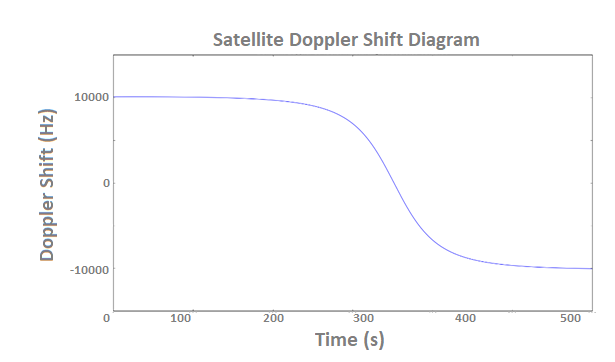

##### Doppler Shift Compensation
•	Adjust center frequency tuning of either transmitter or receiver based on predicted doppler shift predetermined by satellite orbital path trajectory

•	Oversample down-converted doppler shifted RF signal to encompass whole bandwidth of predicted doppler shift and compensate 
for doppler shift digitally. This requires a receiver with larger bandwidth compared to the actual baseband signal. 

•	Implement a frequency tracking phased locked loop which locks on to carrier signal and automatically tunes to received signal center frequency

•	Utilize software to detect center frequency offset of received signal and retune the receiver accordingly 

#### Radio Propagation Factors Beyond the Scope of the Design Problem

##### Multipath Fading
Inherent to all wireless radio communication channels is multipath propagation. When radio waves are transmitted from an antenna, different portions of the wave-front travelling away will usually interact with different obstacles. The sum of a fraction of these waves will reach the receiver, along with the direct line-of-sight component if it exists. These interactions are primarily reflection, refraction, diffraction, and scattering. In land based communication systems, radio wave can interact with objects of all sizes including terrain, buildings, cars, and people. How detrimental multipath propagation is to a receiver is location dependent. Amazingly, the atmosphere can refract and scatter radio waves as they travel from space to Earth’s surface. This can be attributed to changing refractive indices associated with different air pressures and temperatures at different altitudes as well as clouds between the satellite and ground station. The total electron content (TEC) is a common metric used to determine propagation delay due to the ionosphere. The “richness” for a multipath propagation channel is related to the inter-symbol interference experienced by the desired receiver. Inter-symbol interference occurs when a previously transmitted symbol interferes with the consecutive transmitted symbol due to delayed components of the previous signal. This type of interference can severely affect receiver performance in high multipath environments. 

###### Multipath Propagation Compensation
•	Slower data rate

•	Delay lines

•	Digital signal processing

•	Cyclical Prefix

•	Directional antennas

##### Realistic Free Space Path Loss Exponent
The free space path loss of a signal is usually expressed as an equation directly dependent on the distance between receiver and transmitter antenna squared. This usually refers to the power of an isotropic antenna radiating in all directions from a point source equally. In reality, the free space path loss exponent is usually a value between 2 and 4. The realistic free space path loss can be affected by atmospheric conditions, multipath, fading, and many other factors. In satellite communications, the physical conditions of the atmosphere change drastically with respect to temperature, density, transparency, and composition. The ionosphere, which has varying levels of ionization depending on altitude and time of day affect long-wavelength radio signals the most. Radio waves can be reflected or absorbed by the ionosphere. To derive the true free space path loss, multiple calculations with respect to the varying parameters must be considered. Many sophisticated models such as the Irregular Terrain Model (ITM) have been created to describe realistic path losses using empirical data and statistical models. 

##### Fading
Fading is the time-dependent variation of received signal strength which may be due to multiple conditions or events. Fading can be described as fast or slow depending on the variation of signal power over a symbol time. As described above, multipath is a major source of fading in signal strength due to constructive and destructive interference. However, other factors include scattering and diffraction of electromagnetic waves. A moving receiver and or transmitter will also induce fading due to signal strength changing significantly every quarter wavelength.



## Receiver

#### Antenna

Receiver Antenna Gain is the peak gain of the antenna, which is calculated through electromagnetic modeling and/or testing at the signal frequency. This value determined is through research and extended knowledge from known values of existing eggbeater antennae. The current design choice for Ground Sphere, an eggbeater antenna, will be used in our examples.

The Received Power is the sum of the Transmit EIRP, Downlink Path Loss, Polarization Loss, Atmospheric Losses, Receiver Antenna Gain, and Receiver Pointing Losses.

$$P_{Re}[dBm] = EIRP[dB] + L_{Path} [dB]+ L_{Pol}[dB] + L_{At} [dB]+ G_{Re}[dB] + L_{ReP}[dB] $$

#### Amplification

If the desired antenna does not have sufficient gain to achieve the required Eb/No value, a Low Noise Amplifier (LNA) can be used to increase signal strength. Adding a LNA close to the antenna will amplify the signal without generating too much additional noise. 

#### Radio

To interpret the radio frequency signal as data, a hardware or software radio may be used. Software radios are ever growing in popularity and can be purchased for reasonably low prices. Software radios can be configured to decode a range of frequencies and modulation schemes on the fly -- making them an excellent purchase for use in varying radio frequency projects. Hardware radios are better at accomplishing specific tasks and may be cheaper overall, but their functionality is limited.

## Solve for Link Margin

Now that all the bits and pieces have been solved for, plug them back into the equations listed at the beginning of the document to solve for the Link Margin.

$$MDS[dB] = -174 + 10log_{10}(BW[kHz]*1000) + N_{Sys}[dB]$$

$$P_{Re}[dB] = {EIRP}[dB] + L_{Path}[dB] + L_{Pol}[dB] + L_{At}[dB] + G_{Re}[dB] + L_{ReP}[dB]$$

$$ {Eb/No}_F[dB] = {P_{Re}}[dB] -{MDS}[dB]$$

$${Eb/No}_R[dB] = {Eb/No}_T[dB] - {L_{Imp}}[dB]$$

$$Link_{Mar}[dB] = {{Eb/No}_F}[dB] - {{Eb/No}_R}[dB]$$

## Example Problem

Ground Sphere Mk 3 is a ground station node that will receive APT data from NOAA weather satellites and reproduce an image taken by the satellite as it orbits overhead. By using the methods detailed throughout this document, a final link margin value can be found. In theory, if this value is positive, the system with the given inputs will be able to decode an APT transmission from a NOAA satellite. If the value is negative, the system may fail to decode the signal.

For the Ground Sphere Mk 3, we are able to determine all values necessary to compute the final link margin. It is important to note that these calculations are valid for our particular setup, but may not be for others with different systems. This example is valid for average weather conditions, average orbital inclinations, average solar activity, etc. Conditions outside of the average may result in different values, but this is inherently an unavoidable issue in link budget calculation. Below is an example for an average input case for our system.

|Inputs|
|---|---|---|---|---|
|Parameter|	Value|	Unit|Notes|
|Ground Station Altitude| 400 |m      |Blacksburg, VA used as the ground station location.|
|Satellite Orbital Altitude| 860 | km |[1]|
|Orbit Elevation Angle|       25 | deg|Average elevation angle based on orbital simulations.|
|Downlink Frequency|137.5|MHz         |[1]|
|Target Eb/No|20.0|dB                 |Reasonable assumption for APT transmissions. [4]|
|Implementation Loss|-1.0|dB          |Reasonable assumption for implementation of the system. [4]|
|Transmit Power|5.0|W                 |[1]|
|Transmit Losses|-1.0|dB              |Reasonable assumption for multipath or other transmission losses. [4]|
|Transmit Antenna Gain|4.0|dB         |[1]|
|TX Pointing Losses|-3.0|dB           |Reasonable assumption for possible pointing losses of satellite. [4]|
|Polarization Loss|0.0|dB             |Egg Beater antenna.|
|Atmosphere Losses|-0.75|dB           |[2]|
|Receive Antenna Gain|5.4|dB          |Reasonable assumption based on existing designs [3].|
|RX Pointing Losses|-3.0|dB           |Reasonable assumption based on existing designs [3].|
|System Noise Figure|5.0|dB           |Reasonable assumption for worst case noise figure of system. [4]|
|Noise Bandwidth|34.0|kHz             |[1]|

|Intermediates|
|---|---|---|---|
|Parameter|	Value|	Unit|
|Downlink Wavelength|2.180 $\pm$ 0.001|m|
|Link Distance|1700 $\pm$ 100|km|
|Required Eb/No|21.0 $\pm$ 0.1|dB|
|Transmit Power|37.0 $\pm$ 0.1|dBm|
|Transmit EIRP|37.0 $\pm$ 0.1|dBm|
|Downlink Path Loss|-140 $\pm$ 1|dB|

The Target Eb/No for NOAA Automatic Picture Transmission (APT) reception is typically around 20 - 25 dB, however it varies based on communication scheme (e.g. modulation, forward error correction, coding schemes, etc.).

The receiver values correspond to a sea-level Ground Sphere Mk3 node on the Eastern seaboard of the United States. Transmitter values were taken from NOAA-19 APT transmission data sheets. Most NOAA weather satellites are in a highly inclined (polar) orbit, so location on the globe should not influence the value significantly, although differences in altitude could vary the link distance, thereby adjusting the path loss by measurable values.

Tolerances are derived from NOAA-19 orbit information

Once all values are accurately found for the system, using the equations to find link margin are relatively straightforward. Because most values are in the log scale, addition can be used to calculate a final link margin for the system.

#### Minimum Detectable Signal
First, calculate the minimum detectable signal using the bandwidth and system noise values. This value (in dBm) is the lowest received signal power the receiver is capable of distinguishing from noise.

$$MDS[dBm] = -174 + 10log_{10}(BW[kHz]*1000) + N_{Sys}[dB]$$
$$MDS[dBm] = -174 + 10log_{10}(34 * 1000) + 5.0$$
$$MDS[dBm] = -174 + 45 + 5.0$$
$$MDS[dBm] = -124$$

#### Received Power
Now, using the transmit and signal propogation values, an approximate value for average received power can be found. This more or less estimates the signal power at the terminals of the receiver during a transmission.

$$P_{Re}[dBm] = {EIRP}[dB] + L_{Path}[dB] + L_{Pol}[dB] + L_{At}[dB] + G_{Re}[dB] + L_{ReP}[dB]$$
$$P_{Re}[dBm] = 37.0 - 139.7 - 0.0 - 0.75 + 5.4 - 3.0$$
$$P_{Re}[dBm] = -101$$

#### Energy Per Bit
In order to effectively interpret the signal data, a sufficient energy per bit must be met. Calculating the target Eb/No and the estimated Eb/No enables the final link margin to be performed.

$${Eb/No}_F[dB] = {P_{Re}}[dB] -{MDS}[dB]$$
$${Eb/No}_F[dB] = -101 + 123.7$$
$${Eb/No}_F[dB] = 22.7$$

$${Eb/No}_R[dB] = {Eb/No}_T[dB] - {L_{Imp}}[dB]$$
$${Eb/No}_R[dB] = 20.0 + 1.0$$
$${Eb/No}_R[dB] = 21.0$$

#### Link Margin
Link margin estimates the expected performance for decoding the signal. There are many assumptions in this basic calculation, but overall a positive value is a good sign that the signal will be decodable.

$$Link_{Mar}[dB] = {{Eb/No}_F}[dB] - {{Eb/No}_R}[dB]$$
$$Link_{Mar}[dB] = 22.7 - 21.0$$
$$Link_{Mar}[dB] = 1.7$$

The final results are shown in the table below.

|Results|
|---|---|---|---|
|Parameter|	Value|	Unit|
|Received Power|-100 $\pm$ 10|dBm|
|MDS|-124 $\pm$ 1|dBm|
|Eb/No|23 $\pm$ 1|dB|
|Link Margin|1.7 $\pm$ 0.1|dB|

## Test Cases

In the tables below, various combinations of input variables are shown. These test cases have been created to validate the python software for this project, as well as to show the results of different input combinations in the Ground Sphere Mk 3 project. Below the tables, a description about the each test case will explain the input values clearly.

### GS Mk. 3 and Variations

This section of test cases include the example above and variations on our proposed design. These comparisons should validate that our design is a good choice when considering all elements of the design. Additionally, it helps test changes to certain fields to determine their effects on the calculations.

||Tolerance|Case 1|Case 2|Case 3|Case 4|Case 5|Case 6|Case 7|
|---|---|---|---|---|---|---|---|---|
|$\textbf{Inputs[units]}$|||||||||
|Ground Station Altitude[m]||    400|400  |400  |400  |400  |400  |400  |
|Satellite Orbital Altitude[km]||860|860  |860  |860  |860  |860  |860  |
|Orbit Elevation Angle[deg]||     25|90   |5    |45   |45   |25   |90   |
|Downlink Frequency[MHz]||     137.5|137.5|137.5|137.5|137.5|137.5|137.5|
|Target Eb/No[dB]||             20.0|20.0 |20.0 |20.0 |20.0 |20.0 |20.0 |
|Implementation Loss[dB]||      -1.0|-1.0 |-1.0 |-1.0 |-1.0 |-1.0 |-1.0 |
|Transmit Power[W]||             5.0|5.0  |5.0  |5.0  |5.0  |5.0  |5.0  |
|Transmit Losses[dB]||          -1.0|-1.0 |-1.0 |-1.0 |-1.0 |-1.0 |-1.0 |
|Transmit Antenna Gain[dB]||     4.0|4.0  |4.0  |4.0  |4.0  |4.0  |4.0  |
|TX Pointing Losses[dB]||       -3.0|-3.0 |-3.0 |-3.0 |-3.0 |-3.0 |-3.0 |
|Polarization Loss[dB]||         0.0|0.0  |0.0  |0.0  |0.0  |-3.0 |-3.0 |
|Atmosphere Losses[dB]||       -0.75|0.0  |-2.1 |-0.3 |-0.3 |-0.75|0.0  |
|Receive Antenna Gain[dB]||      5.4|5.4  |5.4  |24   |24   |2.1  |2.1  |
|RX Pointing Losses[dB]||       -3.0|0.0  |-6.0 |0.0  |-30.0|0.0  |-12.0|
|System Noise Figure[dB]||       5.0|5.0  |5.0  |5.0  |5.0  |5.0  |5.0  |
|Noise Bandwidth[kHz]||           34|34   |34   |34   |34   |34   |34   |
|$\textbf{Intermediates[units]}$|
|Downlink Wavelength[m]|$\pm$ 0.001|2.180|2.180|2.180|2.180|2.180|2.180|2.180|
|Link Distance[km]|     $\pm$ 100  |1700 |  860| 2900| 1200| 1200| 1700|  860|
|Required Eb/No[dB]|    $\pm$ 0.1  |21.0 | 21.0| 21.0| 21.0| 21.0| 21.0| 21.0|
|Transmit Power[dBm]|   $\pm$ 0.1  |37.0 | 37.0| 37.0| 37.0| 37.0| 37.0| 37.0|
|Transmit EIRP[dBm]|    $\pm$ 0.1  |37.0 | 37.0| 37.0| 37.0| 37.0| 37.0| 37.0|
|Downlink Path Loss[dB]|$\pm$ 10   |-140 | -130| -140| -140| -140| -140| -130|
|$\textbf{Outputs[units]}$|
|Received Power[dBm]|$\pm$ 10|-100|-100|-110|-80 |-110|-100|-110|
|MDS[dBm]| $\pm$ 1           |-124|-124|-124|-124|-124|-124|-124|
|Eb/No[dB]| $\pm$ 1          |23  |32  |13  |48  |18  |19  |14  |
|Link Margin[dB]| $\pm$ 0.1  |1.7 |11.2|-7.5|27  |-3.1|-1.6|-7.1|


##### Case 1 - Ground Sphere Mk. 3 
Case 1 is the "Example Problem" worked out in the section above. The "Example Problem" section describes the input values in greater detail. This case uses the Ground Sphere Mk 3 expected system values for NOAA weather satellites broadcasting APT data.

The purpose of this test case is to verify the Ground Sphere Mk 3 node will sufficiently decode data in average conditions. This link budget will be the primary reference for Ground Sphere Mk 3 operations given average conditions. 

##### Case 2 - GS Mk. 3 High Elevation Angle
Case 2 is mostly identical to test case 1 with a modified elevation angle, simulating a favorable orbital pass overhead of the ground station. Most passes are not directly overhead, but this test case goes to show what happens on passes that are directly overhead, and consequently closer with less path loss.

The purpose of this test case is to examine how the link budget will differ with different satellite positions.

##### Case 3 - GS Mk. 3 Low Elevation Angle
Case 3 is mostly identical to test case 1 with a modified elevation angle, simulating an unfavorable orbital pass overhead of the ground station. Occasionally, a low pass will occur and this test case goes to show what happens on passes that are low on the horizon, and are consequently further with more path loss.

The purpose of this test case is to examine how the link budget will differ with different satellite positions.

##### Case 4 - High Gain Antenna With Tracking
Case 4 uses the same satellites as test case 1 with a modified recieving antenna, simulating a more expensive, larger scale ground station. Some of these values were taken from the Virginia Tech Ground Station antennas, as they could potentially be used for a similar purpose. These antennas are significantly higher gain than an eggbeater antenna, but require constant tracking for satellites in low Earth orbit.

The purpose of this test case is to examine how the link budget will differ with different ground stations.

##### Case 5 - High Gain Antenna WIthout Tracking
Case 5 uses the same satellites as test case 1 with a modified recieving antenna, simulating a more expensive, larger scale ground station. Some of these values were taken from the Virginia Tech Ground Station antennas, as they could potentially be used for a similar purpose. A trade-off of using a high gain antenna is the very poor performance without accurate tracking systems. High gain antennas are not always optimal if they are not implemented effectively.

The purpose of this test case is to examine how the link budget will differ with different ground stations.

##### Case 6 - GS Mk. 3 Ground Plane Dipole Antenna
Case 6 is mostly identical to test case 1 with a modified receiving antenna, simulating a different antenna for the ground station. In order to ensure we are considering different options for a receiving antenna, different parameters can be passed to the link budget to see how it performs. Dipole antennas are more efficient at low angles.

The purpose of this test case is to examine how the link budget will differ with different receiver antennas.

##### Case 7 - GS Mk. 3 Ground Plane Dipole Antenna High Elevation Angle
Case 7 is mostly identical to test case 1 with a modified receiving antenna, simulating a different antenna for the ground station. In order to ensure we are considering different options for a receiving antenna, different parameters can be passed to the link budget to see how it performs. Dipole antennas are less efficient at high angles.

The purpose of this test case is to examine how the link budget will differ with different receiver antennas.


### Other Systems

This section of test cases includes link budgets for a small variety of completely different satellite communication systems. All of these systems have known values, so by using them in our link budget calculations, we can justify that our calculations are aligned with existing link budget calculations.

||Tolerance|Case 8|Case 9|Case 10|
|---|---|---|---|---|
|$\textbf{Inputs[units]}$|||||
|Ground Station Altitude[m]||      400|400      |400  |
|Satellite Orbital Altitude[km]||800|845    |20200  |
|Orbit Elevation Angle[deg]||      5|60     |90  |
|Downlink Frequency[MHz]||    437.45|138    |1575.42  |
|Target Eb/No[dB]||             18.0|10.0   |25 |
|Implementation Loss[dB]||       0.0|0.0    |0.0  |
|Transmit Power[W]||             3.0|5.0    |25.6   |
|Transmit Losses[dB]||          -1.0|0.0    |-1  |
|Transmit Antenna Gain[dB]||     2.0|3.0    |13.0  |
|TX Pointing Losses[dB]||        0.0|-0.5   |0.0  |
|Polarization Loss[dB]||         0.0|-3.0   |0.0  |
|Atmosphere Losses[dB]||        -2.4|-0.8   |-3.0  |
|Receive Antenna Gain[dB]||     13.5|5.3    |15  |
|RX Pointing Losses[dB]||       -2.0|0.0    |-2.0  |
|System Noise Figure[dB]||       2.9|3.5    |3.0  |
|Noise Bandwidth[kHz]||           10|17     |1023  |
|$\textbf{Intermediates[units]}$|||||
|Downlink Wavelength[m]|$\pm$ 0.001|      0.685|2.182  |0.189 |
|Link Distance[km]|$\pm$ 10|            2780|960    |20200 |
|Required Eb/No[dB]|$\pm$ 0.1|           18.0|10.0   |25.0 |
|Transmit Power[dBm]|$\pm$ 0.1|          34.8|37.0   |44.1 |
|Transmit EIRP[dBm]|$\pm$ 0.1|           35.8|39.5   | 56.1 |
|Downlink Path Loss[dB]|$\pm$ 1|       -154|-135   |-183 |
|$\textbf{Outputs[units]}$|||||
|Received Power[dBm]|$\pm$ 10|          -110|-90    |-120  |
|MDS[dBm]|$\pm$ 1|                     -131|-128   |-110  |
|Eb/No[dB]|$\pm$ 1|                      22|34     |-6  |
|Link Margin[dB]| $\pm$ 0.1|3.8|24.3|-30.5|


##### Case 8 - AMSAT IARU Link Budget
Case 8 is a link budget based on the example link budget for the AMSAT IARU link budget calculator. This system is not a functional system, it simply validates that our library works in the same way that an existing link budget calculation works.

The purpose of this test case is to validate our library with an existing link budget calculator.

##### Case 9 - Cornell KickSat Link Budget
Case 9 is an example APT link budget for the Cornell KickSat system. This project has similarities to our project, so it should yield similar results and the math should work out very similarly. Small variations in the design should also provide another viewpoint for GS Mk. 3.

The purpose of this test case is to validate our library with an existing link budget for a similar system. 
Link: https://opendesignengine.net/dmsf_files/531?download=615

##### Case 10 - GPS Link Budget
Case 10 is an example link budget using the Global Positioning System (GPS). The transmitter and signal characteristics are well-documented and can be applied to our link budget for verification. Please note that the link margin is negative due to not taking into account the processing gain due to large amount of coding overhead. GPS utilizes spread specrum code division multiplexing in order for receivers to distinguish among different GPS satellites. It accomplishes this by multiplying the satellite data sigal with a psuedorandom code signal unique to each satellite. Using corellation, receivers can back out from the same channel which satelites are in view of the antenna.

The purpose of this test case is to validate our library with an existing link budget for an entirely different system. 


### Edge Cases

This section of test cases include edge cases that should cause the calculations to misbehave. This includes unrealistic values for our Ground Sphere Mk. 3 design. Some of these edge cases should throw errors while some should somehow warn the user that there could be issues with the calculation.

Once an error is reached, the calculation will stop, which leaves all remaining values incorrect.


||Tolerance|Case 11|Case 12|Case 13|Case 14|Case 15|Case 16|Case 17|
|---|---|---|---|---|---|---|---|---|
|$\textbf{Inputs[units]}$|||||||||
|Ground Station Altitude[m]||    400|400  |400      |400  |400  |400  |400  |
|Satellite Orbital Altitude[km]||860|860      |860  |860  |-860 |860  |860  |
|Orbit Elevation Angle[deg]||    -10|90       |25   |90   |90   |90   |90   |
|Downlink Frequency[MHz]||     137.5|0        |137.5|137.5|137.5|137.5|137.5|
|Target Eb/No[dB]||            20.0 |20.0     |20.0 |20.0 |20.0 |20.0 |20.0 |
|Implementation Loss[dB]||    -1.0  |-1.0      |-1.0  |-1.0  |-1.0  |-1.0  |1.0  |
|Transmit Power[W]||           5.0  |5.0      |5.0  |5.0  |5.0  |5.0  |5.0  |
|Transmit Losses[dB]||         -1.0 |-1.0     |1.0  |-1.0 |-1.0 |-1.0 |-1.0 |
|Transmit Antenna Gain[dB]||   4.0  |4.0      |4.0  |-4.0 |4.0  |4.0  |4.0  |
|TX Pointing Losses[dB]||      -3.0 |-3.0     |3.0  |0.0  |0.0  |0.0  |0.0  |
|Polarization Loss[dB]||       0.0  |0.0      |0.0  |0.0  |0.0  |0.0  |0.0  |
|Atmosphere Losses[dB]||   -$\infty$|-$\infty$|0.75 |0.0  |0.0  |0.0  |0.0  |
|Receive Antenna Gain[dB]||    5.4  |5.4      |5.4  |-5.4 |5.4  |5.4  |5.4  |
|RX Pointing Losses[dB]||      -9.0 |0.0      |3.0  |0.0  |0.0  |0.0  |0.0  |
|System Noise Figure[dB]||     5.0  |5.0      |5.0  |5.0  |5.0  |-5.0 |5.0  |
|Noise Bandwidth[kHz]||        34   |34       |34   |34   |34   |34   |0    |
|$\textbf{Intermediates[units]}$|||||||||
|Downlink Wavelength[m]|$\pm$ 0.001|2.180|ERROR|2.180|2.180|2.180|2.180|2.180|
|Link Distance[km]|$\pm$ 100|      4700|      -| 1700|  860|ERROR|  860| 860 |
|Required Eb/No[dB]|$\pm$ 0.1|     21.0|      -| 21.0| 21.0| -   | 21.0| 21.0|
|Transmit Power[dBm]|$\pm$ 0.1|    37.0|      -| 37.0| 37.0| -   | 37.0| 37.0|
|Transmit EIRP[dBm]|$\pm$ 0.1|     37.0|      -| 45.0| 32.0| -   | 37.0| 37.0|
|Downlink Path Loss[dB]|$\pm$ 10|  -150|      -| -140| -130| -   | -130| -130|
|$\textbf{Outputs[units]}$|||||||||
|Received Power[dBm]|$\pm$ 1|ERROR|    -|ERROR|-110  | -   |ERROR|ERROR|
|MDS[dBm]|$\pm$ 1|               -|    -|    -|-124  | -   | -   | -   |
|Eb/No[dB]|$\pm$ 1|              -|    -|    -|14    | -   | -   | -   |
|Link Margin[dB]|$\pm$ 0.1|        -|    -|    -|-6.6| -   | -   | -   |


##### Case 11 - GS Mk. 3 Unrealistic Elevation Angle
Case 11 is an edge case for the link budget. Elevation angles below the horizon will not (under most conditions) satisfy a link. The link budget should identify there is a potential issue with this value and respond accordingly.

The purpose of this test case is to ensure the link budget calculations consider possibly erroneous values.

##### Case 12 - GS Mk. 3 Unrealistic Frequency
Case 12 is an edge case for the link budget. Some frequencies are not realistic and may be incorrect. Negative frequencies are not reasonable for this design, as well as frequencies below VHF or above SHF [6]. The link budget should identify there is a potential issue with this value and respond accordingly.

The purpose of this test case is to ensure the link budget calculations consider possibly erroneous values.

##### Case 13 - GS Mk. 3 Unrealistic Loss Values
Case 13 is an edge case for the link budget. Losses for this link budget library must be negative. Positive losses are not realistic in this design. The link budget should identify there is a potential issue with this value and respond accordingly.

The purpose of this test case is to ensure the link budget calculations consider possibly erroneous values.

##### Case 14 - GS Mk. 3 Unrealistic Gain Values
Case 14 is an edge case for the link budget. Gains for receiving antennae are usually positive. Although negative antennas gains are possible and do occur occasionally, they are not ideal and should be investigated. The link budget should identify there is a potential issue with this value and respond accordingly.

The purpose of this test case is to ensure the link budget calculations consider possibly erroneous values.

##### Case 15 - GS Mk. 3 Unrealistic Distance
Case 15 is an edge case for the link budget. Orbits which are too low (less than 100 km) or negative are probably incorrect. There could also potentially be upper bounds to orbits. The link budget should identify there is a potential issue with this value and respond accordingly.

The purpose of this test case is to ensure the link budget calculations consider possibly erroneous values.

##### Case 16 - GS Mk. 3 Unrealistic Noise Figure
Case 16 is an edge case for the link budget. Noise figures for real systems are always positive. Negative noise figures (although they would be fantastic) do not occur in nature. The link budget should identify there is a potential issue with this value and respond accordingly.

The purpose of this test case is to ensure the link budget calculations consider possibly erroneous values.

##### Case 17 - GS Mk. 3 Unrealistic Signal Bandwidth
Case 17 is an edge case for the link budget. Some bandwidths are not realistic for real systems. This value could vary significantly, but generally no signals have extremely large or extremely small bandwidths due to the nature of systems. The link budget should identify there is a potential issue with this value and respond accordingly.

The purpose of this test case is to ensure the link budget calculations consider possibly erroneous values.

## Glossary

Amplifier: A device used to boost the power of a signal

Antenna: A device used to transmit and receive radio waves

Antenna Beamwidth: The measure of an antenna's gain relative to a power level, usually 3 dB and denoted by an angle (e.g. 15 degrees)

Antenna Gain: The measure of an antenna's capability to concentrate the signal power of a radio wave, frequency dependent

Antenna Polarization: A property of an antenna that determines which spatial direction the energy of radio waves are oriented

Automatic Picture Transmission (APT): A standard or specification used by NOAA satellites to encode and transmit images to 
ground stations

Atmosphere: All of the gas surrounding a planet

Bandwidth: The range of frequencies an electronic circuit or device uses

Binary: A 2-symbol number system based on 1's and 0's

Bit Error Rate (BER): The rate at which errors occur in a communication link

Carrier to Noise Ratio (CNR): The ratio of received RF signal power to noise power

Decibels: A unit of measurement denoting the power of a signal or the power gain/loss of a device relative to factors of 10

Doppler Shift: The phemonena of waves stretching or contracting due to a nonzero relative velocity between two objects

Downlink: Satellite transmitting radio waves down to Earth

Elevation Angle: The vertical angle between a position on earth relative to a satellite

Energy per Bit to Spectral Noise Density (Eb/N0): The ratio of signals bit energy density to the noise density of a receiver

Filter: A device used to pass or block certain frequencies in a signal

Forward Error Correction (FEC): Adding redundant bits to self-correct for bit errors in a receiver

Free Space Path Loss: The amount of power lost by a radio wave travelling through space

Frequency: The measure of cycles or oscillations in a signal

Gain to System Noise Temperature Ratio (G/T): A common quantity used to quickly measure and compare the sensitivity of a receiver or ground station

Ground Station: An antenna or group of antennas which communicate with satellites

Ionosphere: The conductive layer of the atmosphere which interacts and affects radio waves the most

Implementation Loss: Signal loss due to imperfections or errors in modulation or demodulation

Inphase and Quatrature (IQ) Signals: Signals or more generally waves which are 90 degrees out of phase from each other

Minimum Detectable Signal (MDS): The smallest signal power level a receiver is capable of detecting

Modulation: The process of encoding a signal or data onto an electromagnetic wave by changing one or more of its properties 
(frequency, amplitute, phase)

Modulation Error Rate: The amount of error between a received symbol and an ideal symbol in an IQ diagram 

Modulation Symbol: A modulation state which maps to a series of binary value(s)

Multipath Fading: Radio propagation channel effect where delayed portions of a radio wave combine at a receiving antenna causing 
intersymbol interference

National Oceanic and Atmospheric Administration (NOAA): US Federal entity responsible for research and study of Earth's oceans and atmopshere

National Aeronautic and Space Administration (NASA): US Federal entity responsible for the country's civilian access to space, space science, and aeronatical space

Period: Amount of time for a wave's oscillation or cycle

Receiver: A device used to pick up radio wave signals

Satellite: A natural or man-made object orbiting another body

Signal to Noise Ratio (SNR): The ratio of signal power to noise power at the baseband stage of a radio

Slant Range: The distance between a satellite and a position on Earth

Space Weather: Phenomena or conditions (electromagnetic, plasma, nuclear) around the Earth and the solar system originating from 
the Sun or other bodies which can affect humans and our technology

Thermal Noise: Intrinsic, random signal power generated by an electronic device that is both temperature and bandwidth depedent

Transmitter: A device used to generate radio wave signals

UHF: Ultra High Frequency, from 300 MHz to 3 GHz

Uplink: Groundstation or user transmitting radio signals to a satellite

VHF: Very High Frequency, from 30 MHz to 300 MHz

Wavelength: Amount of distance a wave travels over one oscillation or cycle

## References
[1]Earth Observation Portal's Satellite Mission Database Link: https://directory.eoportal.org/web/eoportal/satellite-missions

[2] Satellite: NOAA-19. OSCAR Satellite Info. Link: https://www.wmo-sat.info/oscar/satellites/view/341

[3] AMSAT IARU Link Budget Calculator. AMSAT.

[4] Eggbeater Satellite Antenna. $\text{M}^2$ Antenna Systems, Inc. Link: http://www.m2inc.com/content/PDF%20MANUALS/EGGBEATERS/EB144RK2MMAN03-W.pdf

[5] User's Guide for Building and Operating Environmental Satellite Receiving Stations. NOAA. Link: http://noaasis.noaa.gov/NOAASIS/pubs/Users_Guide-Building_Receive_Stations_March_2009.pdf

[6] Internation Telecommunication Union Frequency Bands, Link: https://www.itu.int/ITU-D/tech/events/2006/SMS4DC_AFR/Training%20Materials/SMS4DC_AFR_TM_4.PDF